In [1]:
# this block initializes the structs for storing acitivities and patients

import os
from datetime import datetime
import pandas as pd
import time
from patient import Patient, Activity
import jsonpickle
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
src = './data/HOA Data'
# to-do

excel = './data/HOA Data/chi_unix.xlsx'
excel = pd.read_excel(excel)


activities = []
ids = []
patients = []

for i in range(len(excel)):
    row = excel.iloc[i]
    if row['Subject Index'] not in ids:
        ids.append(row['Subject Index'])

for id in ids: #flagging dupes for merging
    if len(id) >= 12:
        print(id)

temp_hold= []

for id in ids:
    # fetch all activities for each patients
    activities = []
    for i in range(len(excel)):
        act = excel.iloc[i]
        if act['Subject Index'] == id:            
            activities.append(Activity(
                act['Activity'], act['Length'], act['Record Time'], act['Subject Index']))
    patient = Patient(id, 0, activities, [None], 0, 0)
    
    if len(id) >=12:
        temp_hold.append(patient)
    else:
        patients.append(patient)



CHI2021 103b
CHI2021 105b
CHI2021 107b
CHI2021 104b


In [3]:

#merging temp hold with patients
for temp in temp_hold:
    found = 0
    for patient in patients:
        if patient.id in temp.id:
            patient.activities =  patient.activities + temp.activities #merge activities
            #update excel time
            patient.findMinTime()
            found =1
            break
    if (found ==0):
        temp.id = temp.id[:-1]
        print(temp.id)
        patients.append(temp)
    
            

CHI2021 103


In [4]:
#load in csvs
src = './data/HOA Data'
csv_file = []


for path, subdirs, files in os.walk(src):
    for name in files:  # for every file in this directory
        file = os.path.join(path, name)

        if 'ACC.csv' in file:  # if file name contains acc.csv, read data
            acc = pd.read_csv(file)
            csv_file.append(acc)  # append to a list

print(len(patients), len(csv_file))

53 39


In [5]:
for patient in patients:
    #for every unique patient - cross reference csvs
    buffer = 3*60*60
    markers  = [0]*len(csv_file)
    for i,csv in enumerate(csv_file):
        if csv is None:
            continue
        time = float(csv.columns.values[0])
        
        if time >= (patient.excel_time - buffer) and time <= (patient.excel_time +buffer):  # within buffer
            patient.clean_acc(csv)
            markers[i]=1
            csv_file[i]=None
            i-=1
            break
    print(sum(markers), patient.id)
print(csv_file)

0 CHI2021 231
1 CHI2021 223
1 CHI2021 224
0 CHI2021 114
0 CHI2021 309
0 CHI2021 311
1 CHI2021 229
1 CHI2021 230
1 CHI2021 307
1 CHI2021 115
1 CHI2021 111
1 CHI2021 225
1 CHI2021 113
1 CHI2021 210
1 CHI2021 227
1 CHI2021 112
1 CHI2021 222
1 CHI2021 207
1 CHI2021 221
1 CHI2021 228
1 CHI2021 220
1 CHI2021 219
1 CHI2021 213
1 CHI2021 106
1 CHI2021 216
1 CHI2021 214
1 CHI2021 217
1 CHI2021 206
1 CHI2021 208
1 CHI2021 306
1 CHI2021 211
1 CHI2021 212
1 CHI2021 110
1 CHI2021 209
0 CHI2021 304
0 CHI2021 215
0 CHI2021 303
0 CHI2021 305
0 CHI2021 302
0 CHI2021 202
0 CHI2021 204
0 CHI2021 301
0 CHI2021 109
0 CHI2021 108
0 CHI2021 205
0 CHI2021 203
0 CHI2021 201
0 CHI2021 107
0 CHI2021 105
0 CHI2021 104
0 CHI2021 101
0 CHI2021 102
0 CHI2021 103
[None,       1622758197.000000   1622758197.000000   1622758197.000000.1
0                  32.0                32.0                  32.0
1                   1.0               -25.0                  56.0
2                  -2.0               -26.0          

In [6]:
#print(jsonpickle.encode(patients[11], indent=4))
print('Patients without hits')

lost_patients = []
for patient in patients:
    if (patient.acc  is None):
        print(patient.id, patient.excel_time)
        lost_patients.append(patient)
print('Not found patients: ', len(lost_patients))

print('Csvs without hits')
lost_csvs = []
for csv in csv_file:
    if csv is not None:
        print(csv.head())
        lost_csvs.append(csv)
print('Not found CSVs:',  len(lost_csvs))


Patients without hits
CHI2021 231 1632940487
CHI2021 114 1628972286
CHI2021 309 1628606519
CHI2021 311 1628536683
CHI2021 304 1622902439
CHI2021 215 1622819510
CHI2021 303 1622557209
CHI2021 305 1622485854
CHI2021 302 1622218433
CHI2021 202 1622138631
CHI2021 204 1621513330
CHI2021 301 1622047028
CHI2021 109 1621957075
CHI2021 108 1621880215
CHI2021 205 1621621226
CHI2021 203 1621453259
CHI2021 201 1621017177
CHI2021 107 1620079227
CHI2021 105 1619803740
CHI2021 104 1619644918
CHI2021 101 1619469002
CHI2021 102 1619194627
CHI2021 103 1622064809
Not found patients:  23
Csvs without hits
   1622758197.000000   1622758197.000000   1622758197.000000.1
0               32.0                32.0                  32.0
1                1.0               -25.0                  56.0
2               -2.0               -26.0                  56.0
3               -2.0               -26.0                  56.0
4               -3.0               -25.0                  58.0
   1622752193.000000   162275

In [7]:
#second pass to match up lost_csvs with lost_patients
buffer = 2000 *60 *60
for i, csv in enumerate(lost_csvs):
    if csv is None:
        continue
    time = float(csv.columns.values[0])
    for patient in lost_patients:
        if time >= (patient.excel_time - buffer) and time <= (patient.excel_time + buffer):  # within buffer
            print('match')
            break

match
match
match
match
match
match
match
match
match


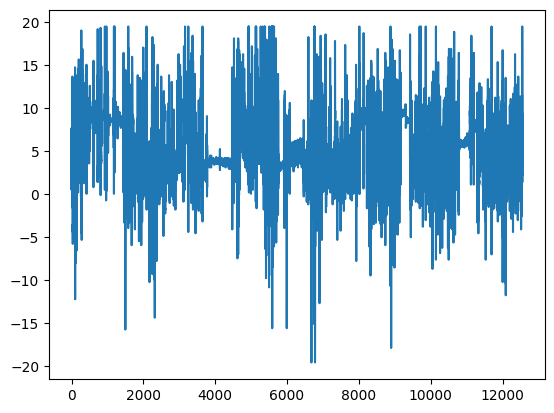

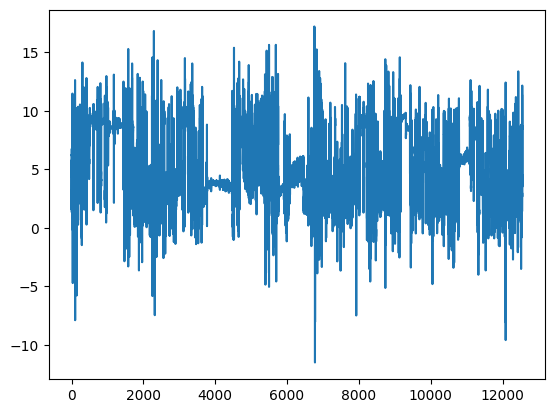

{
    "py/object": "patient.Activity",
    "name": "B2_TWT_A",
    "length": "00:02:00",
    "start": {
        "py/reduce": [
            {
                "py/function": "numpy.core.multiarray.scalar"
            },
            {
                "py/tuple": [
                    {
                        "py/reduce": [
                            {
                                "py/type": "numpy.dtype"
                            },
                            {
                                "py/tuple": [
                                    "i8",
                                    false,
                                    true
                                ]
                            },
                            {
                                "py/tuple": [
                                    3,
                                    "<",
                                    null,
                                    null,
                                    null,
          

In [8]:
#### Filtering
plt.plot(patients[1].acc['t'].to_numpy(), patients[1].acc['x'])
fig = px.line(y=patients, x='time(s)', y=patients[1].acc.columns[0:3])

sample = patients[1].butter()
plt.plot(patients[1].acc['t'].to_numpy(), sample[0])
plt.show()
for activity in patients[1].activities:
    print(jsonpickle.dumps(activity, indent=4))
